# **Laboratorio 7 - Data Science**

## **1. Carga de Conjunto de datos**

**Importación de librerías**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Construir un dataframe con el conjunto de datos**

In [5]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Verificar el tipo de datos de cada observación del dataset**

In [6]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


 **Descripción de variables**

|**Variable**|**Tipo**|**Descripción**|
|---|---|---|
| Pregnancies| int64|Cantidad de embarazos|
|Glucose        |   int64|Concentración de Glucosa|
|BloodPressure  |   int64|Presión de sangre diastólica (mmHg)|
|SkinThickness  |   int64|Grosor de pliegue cutáneo del Triscep (mm)|
|Insulin        |   int64|Suero de insulina 2-Horas (mu U/ml)|
|BMI            |   float64|Índice de masa corporal (Peso en Kg/(estatura en mts)) $^{2}$|
|DiabetesPedigreeFunction|  float64|Función de pedigree de diabetes|
|Age            |   int64|Edad en años|
|Outcome        |   int64|**1**: Diabetes , **0**: No Diabetes|


## **2. Análisis Exploratorios de Datos**

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Obtener valores nulos**

In [8]:
null_counts = df.isnull().sum()
null_counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Contar la cantidad de ceros por variable**

In [9]:
zero_counts = (df == 0).sum()
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Algunas de las variables contienen '0', lo cual es un poco realista, lo que podría tomarse como un valor faltante dentro del dataset. Para ello, se reemplazaran los valores sospechosos por 'Nan' para que AutoGluon los pueda manejar correctamente.

In [10]:
import numpy as np

df_clean = df.copy()

# Columnas donde los ceros no son fisiológicos
cols_with_invalid_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Reemplazar ceros por NaN en esas columnas
df_clean[cols_with_invalid_zeros] = df_clean[cols_with_invalid_zeros].replace(0, np.nan)

missing_percent = df_clean.isnull().mean() * 100

missing_percent

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

**Distribución de las variables utilizando histogramas**

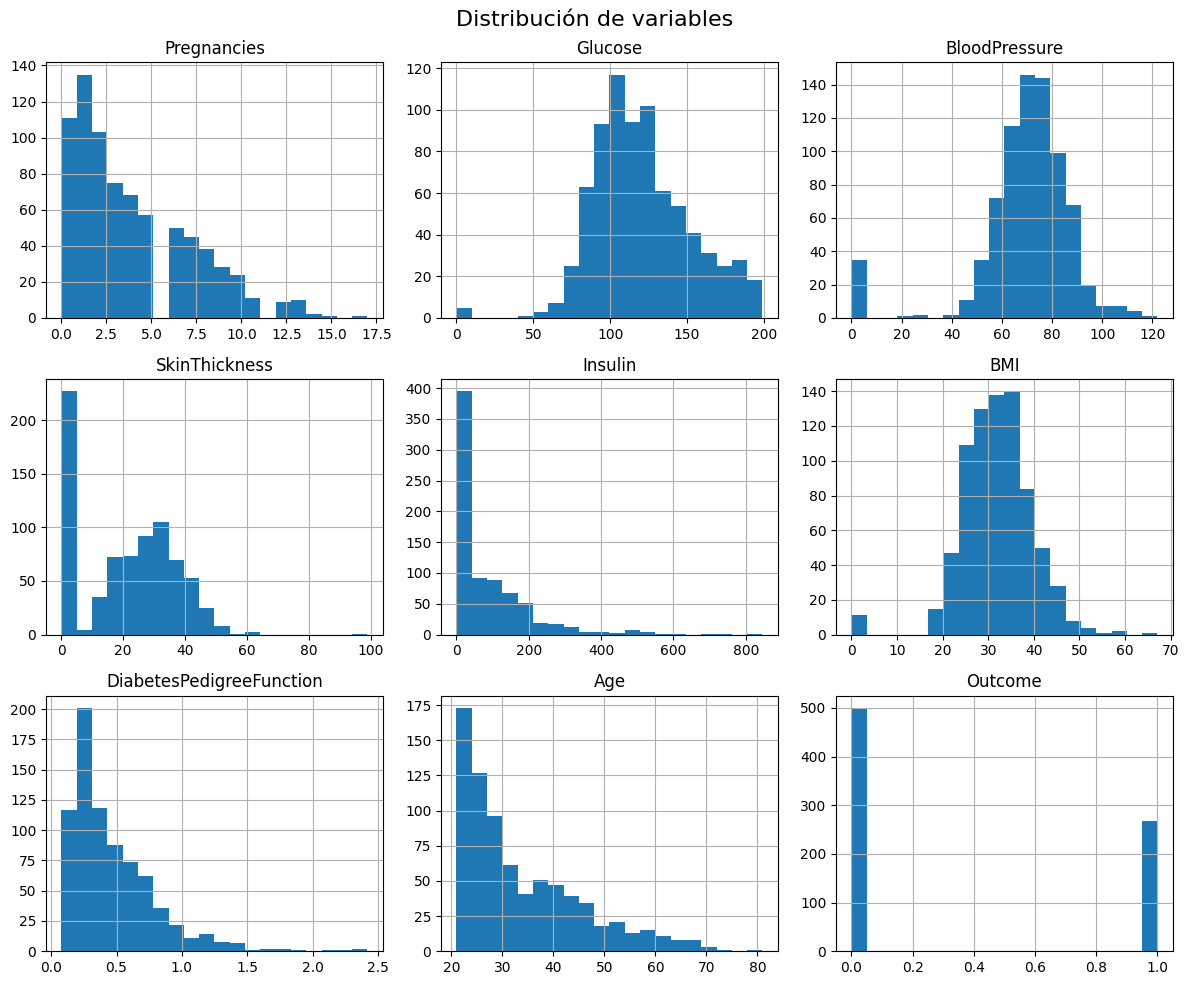

In [11]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribución de variables", fontsize=16)
plt.tight_layout()
plt.show()

1. Pregnancies (número de embarazos)

- La mayoría de los valores están entre 0 y 6, con pocos casos extremos (hasta 17 embarazos).

- La variable se encuentra sesgada hacia valores bajos.

- Es esperable porque la mayor parte de la población tiene pocos embarazos.

2. Glucose (nivel de glucosa en sangre)

- Distribución aproximadamente normal pero con un pico extraño en 0, lo que indica datos faltantes.

- Valores altos (>150) están asociados con casos de diabetes.

3. BloodPressure (presión arterial)

- Centrada alrededor de 70–80 mmHg, que es un rango normal.

- Igual que en glucosa, aparece un grupo en 0 que no es fisiológicamente posible.

4. SkinThickness (grosor de pliegue cutáneo)

- Gran parte de los registros están en 0, indicando muchos valores faltantes.

- En los valores válidos, se concentra entre 15 y 40 mm, lo cual es clínicamente razonable.

5. Insulin

- Distribución muy sesgada, con muchísimos valores faltantes.

- En los valores válidos, varía ampliamente (hasta más de 800), lo que introduce outliers muy extremos.

6. BMI (Índice de Masa Corporal)

- Distribución con forma de campana, centrada en 30, lo que indica tendencia al sobrepeso/obesidad en la muestra.

- Aparecen algunos valores en 0, probablemente faltantes.

7. DiabetesPedigreeFunction

- Variable sesgada hacia la derecha 

- La mayoría de las personas tienen valores bajos (<1), pero hay casos extremos (>2).

- Refleja que en pocas familias la predisposición genética es muy alta.

8. Age

- Distribución sesgada hacia valores bajos dado que la mayoría de pacientes tienen entre 20 y 40 años.

- Sin embargo, también hay adultos mayores (hasta 81).

9. Outcome (variable objetivo)

- Desbalance claro, puesto que la mayoría son 0 (no diabéticos) y menos casos son 1 (diabéticos).

- Este desbalance debe considerarse en el modelado.

**Distribución de las variables utilizando boxplots para detectar valores atípicos**

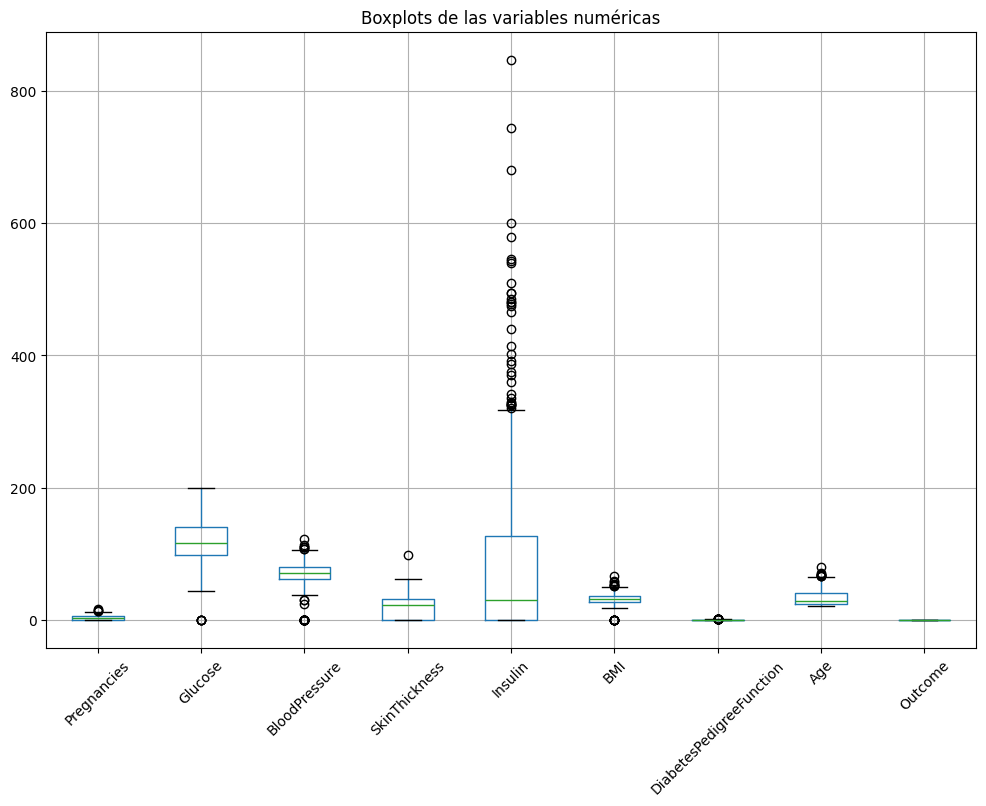

In [12]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplots de las variables numéricas")
plt.xticks(rotation=45)
plt.show()

En el caso de **Glucose**, el boxplot evidencia una distribución relativamente concentrada entre 90 y 150, pero con presencia de valores atípicos en los extremos altos. Esto es consistente con la naturaleza clínica de la glucosa, donde niveles elevados se asocian con diabetes. Sin embargo, también se observa un grupo de valores en cero, que no son fisiológicamente posibles y deben tratarse como datos faltantes.

El boxplot de **BloodPressure** muestra una dispersión moderada, con la mayoría de valores entre 60 y 90, rango considerado normal. Al igual que con la glucosa, aparecen ceros que indican registros incorrectos o faltantes, lo cual resalta la necesidad de una limpieza previa antes del modelado.

En **SkinThickness** y especialmente en **Insulin**, los boxplots revelan un gran número de valores atípicos. En el caso de la insulina, los outliers se extienden hasta valores extremadamente altos (más de 800), lo que genera una distribución muy dispersa. Además, ambos indicadores presentan acumulación de ceros, nuevamente señal de datos faltantes. Esta situación puede afectar el entrenamiento de modelos, ya que introduce ruido en las predicciones.

El **BMI** presenta una distribución más estable, con la mayoría de valores entre 25 y 40, lo que indica una tendencia general hacia el sobrepeso y la obesidad en la población estudiada. No obstante, algunos ceros vuelven a aparecer, lo que confirma la necesidad de tratarlos como nulos.

Finalmente, el boxplot de **Pregnancies** y **Age** muestran pocos valores atípicos y una distribución más compacta, por lo que pueden considerarse variables más confiables dentro del conjunto de datos. Esto las convierte en buenos candidatos para aportar información estable a los modelos predictivos.

**Distribución de clases para la variable "Outcome"**

C:\Users\Ale\AppData\Local\Temp\ipykernel_13444\1934927133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


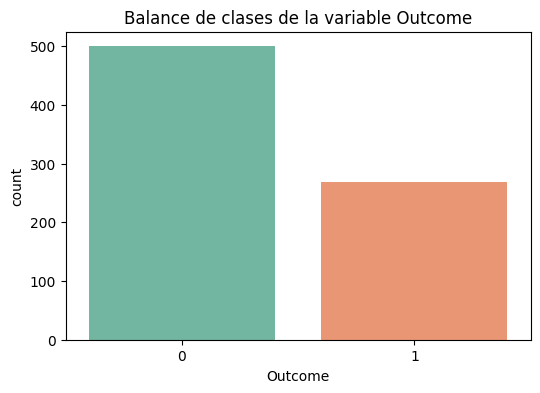

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Balance de clases de la variable Outcome")
plt.show()

La gráfica de balance de clases de la variable **Outcome** evidencia un desbalance claro en el conjunto de datos. La clase 0, que representa a los pacientes **sin diagnóstico de diabetes**, tiene una frecuencia considerablemente mayor, con alrededor de 500 casos. En contraste, la clase 1, correspondiente a los pacientes **con diabetes**, cuenta con aproximadamente 260 observaciones.

Este desbalance implica que el modelo podría inclinarse a predecir con mayor frecuencia la clase mayoritaria (no diabéticos), alcanzando una aparente alta precisión, pero con bajo desempeño en la identificación de los casos positivos de diabetes. En contextos médicos, este sesgo es especialmente delicado, ya que los falsos negativos (personas con diabetes clasificadas como sanas) representan un riesgo significativo.

Por esta razón, al evaluar el modelo no basta con utilizar solo la métrica de accuracy, sino que es fundamental complementar con precisión, recall y F1-score, que permiten medir mejor el rendimiento en la detección de la clase minoritaria. Además, puede ser recomendable aplicar técnicas de balanceo, como SMOTE (Synthetic Minority Over-sampling Technique) o ponderación de clases, para mitigar este problema y mejorar la capacidad predictiva hacia los casos positivos de diabetes.

**Matriz de correlación de todas las variables**

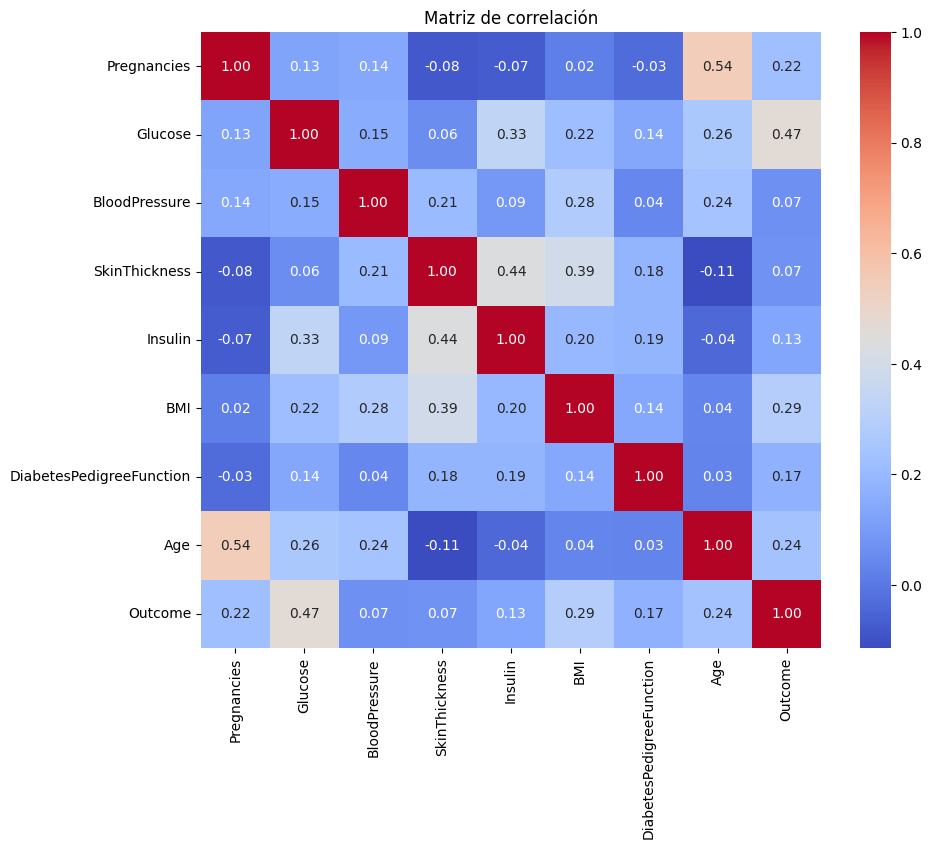

In [14]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

El mapa de calor de correlaciones muestra relaciones importantes entre las variables y la variable objetivo **Outcome**. La correlación más fuerte se observa con Glucose, lo que confirma que los niveles altos de glucosa en sangre son el indicador principal para predecir la presencia de diabetes. Otras variables que presentan correlaciones moderadas son el **BMI** (índice de masa corporal) y la **Edad**, lo cual refleja que el sobrepeso y el envejecimiento son factores de riesgo relevantes en el desarrollo de la enfermedad.

Además, se destaca la relación entre **Pregnancies** y **Age**, lo cual es lógico porque a mayor edad es más probable que una mujer haya tenido más embarazos. También se observa cierta correlación entre **Insulin** y **SkinThickness**, dos medidas clínicas relacionadas con el metabolismo. Sin embargo, la mayoría de las correlaciones entre variables no son muy altas, lo que sugiere que cada característica aporta información complementaria para la predicción.

## **3. Entrenamiento con AutoGluon**

In [17]:

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

c:\Users\Ale\OneDrive - UVG\Escritorio\Cuarto Año\Semestre2\Data Science\LAB7-DS\venv_autogluon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
df = df_clean.copy()

train_data, test_data = train_test_split(df, test_size=0.2, random_state=8)

# Convertir a formato AutoGluon
train_data = TabularDataset(train_data)
test_data = TabularDataset(test_data)

# Variable objetivo
label = "Outcome"

In [19]:
predictor = TabularPredictor(
    label=label,
    eval_metric="accuracy"   
).fit(
    train_data,
    presets="best_quality",  
    time_limit=300           
)

No path specified. Models will be saved in: "AutogluonModels\ag-20250927_010818"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       2.84 GB / 15.78 GB (18.0%)
Disk Space Avail:   225.43 GB / 931.89 GB (24.2%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of

In [20]:
performance = predictor.evaluate(test_data)

In [21]:
predictor_lr = TabularPredictor(label=label).fit(
    train_data,
    hyperparameters={'LR': {}}, 
    time_limit=60
)
performance_lr = predictor_lr.evaluate(test_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250927_011433"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       3.89 GB / 15.78 GB (24.6%)
Disk Space Avail:   228.04 GB / 931.89 GB (24.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='best'    : Maximize acc

In [22]:
feature_importance = predictor.feature_importance(test_data)
print(feature_importance)

Computing feature importance via permutation shuffling for 8 features using 154 rows with 5 shuffle sets...
	22.57s	= Expected runtime (4.51s per shuffle set)
	3.99s	= Actual runtime (Completed 5 of 5 shuffle sets)


                          importance    stddev   p_value  n  p99_high  \
Glucose                     0.102597  0.028821  0.000675  5  0.161941   
Age                         0.012987  0.020014  0.110207  5  0.054197   
Pregnancies                 0.002597  0.008712  0.270735  5  0.020535   
BloodPressure              -0.001299  0.008466  0.625566  5  0.016134   
Insulin                    -0.002597  0.011796  0.675869  5  0.021691   
SkinThickness              -0.007792  0.012491  0.882252  5  0.017926   
DiabetesPedigreeFunction   -0.011688  0.015503  0.916448  5  0.020233   
BMI                        -0.016883  0.007404  0.996506  5 -0.001639   

                           p99_low  
Glucose                   0.043254  
Age                      -0.028223  
Pregnancies              -0.015341  
BloodPressure            -0.018731  
Insulin                  -0.026886  
SkinThickness            -0.033510  
DiabetesPedigreeFunction -0.043609  
BMI                      -0.032128  


## **4. Evaluación del Modelo**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Tabla de mejores modelos

leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

                          model  score_test  score_val eval_metric  \
0            CatBoost_r9_BAG_L1    0.785714   0.737785    accuracy   
1               CatBoost_BAG_L1    0.772727   0.791531    accuracy   
2         ExtraTreesGini_BAG_L1    0.766234   0.762215    accuracy   
3             LightGBMXT_BAG_L1    0.766234   0.798046    accuracy   
4         ExtraTreesEntr_BAG_L1    0.766234   0.744300    accuracy   
5          LightGBM_r131_BAG_L1    0.766234   0.796417    accuracy   
6          CatBoost_r177_BAG_L1    0.753247   0.796417    accuracy   
7         NeuralNetTorch_BAG_L1    0.746753   0.799674    accuracy   
8       RandomForestEntr_BAG_L1    0.746753   0.775244    accuracy   
9        NeuralNetFastAI_BAG_L1    0.746753   0.807818    accuracy   
10               XGBoost_BAG_L1    0.746753   0.793160    accuracy   
11         LightGBMLarge_BAG_L1    0.740260   0.807818    accuracy   
12    NeuralNetTorch_r79_BAG_L1    0.740260   0.802932    accuracy   
13          Weighted

In [24]:
y_true = test_data[label]
y_pred = predictor.predict(test_data)
y_proba = predictor.predict_proba(test_data)[1]

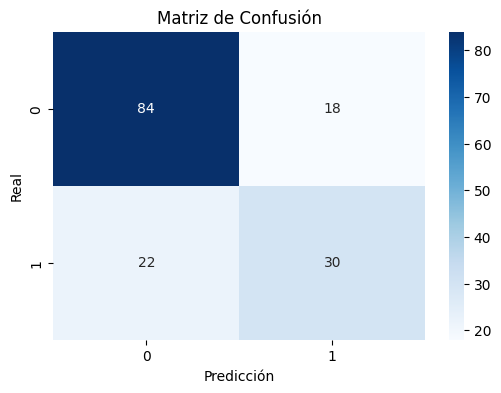

In [25]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

El modelo con mejor desempeño en las pruebas fue **CatBoost_r9_BAG_L1**, alcanzando una accuracy de 0.78 en el conjunto de prueba. Este resultado lo ubica por encima de otras variantes como CatBoost, LightGBM o RandomForest, mostrando que CatBoost es especialmente eficaz para este problema tabular.

La matriz de confusión del mejor modelo refleja un comportamiento equilibrado en la clasificación. El modelo identificó correctamente 84 casos negativos (verdaderos negativos) y 30 casos positivos (verdaderos positivos). Sin embargo, cometió 18 falsos positivos (predijo diabetes cuando no la había) y 22 falsos negativos (clasificó como sanos a pacientes con diabetes).

Este patrón evidencia que el modelo es relativamente confiable al reconocer a los pacientes sin diabetes, pero aún tiene limitaciones al identificar a los casos positivos, lo cual es crítico en un contexto médico, ya que los falsos negativos pueden tener consecuencias graves.

In [26]:
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, digits=3))

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.792     0.824     0.808       102
           1      0.625     0.577     0.600        52

    accuracy                          0.740       154
   macro avg      0.709     0.700     0.704       154
weighted avg      0.736     0.740     0.738       154



El reporte de clasificación muestra un accuracy global del 74%, lo que indica que el modelo acierta aproximadamente tres de cada cuatro predicciones. Si bien es un valor aceptable, conviene profundizar en las métricas por clase debido al desbalance del dataset.

Para la clase 0 (no diabéticos), el modelo alcanzó una precisión de 0.79 y un recall de 0.82, lo que significa que identifica correctamente a la mayoría de los pacientes sanos y comete pocos falsos positivos. El F1-score de 0.81 confirma que esta clase está bien representada en las predicciones.

En contraste, la clase 1 (diabéticos) presenta un desempeño más limitado, con precisión de 0.62 y recall de 0.58. Esto implica que, aunque más de la mitad de los pacientes con diabetes fueron identificados, el modelo todavía deja escapar un número significativo de casos positivos, lo que se refleja en un F1-score de apenas 0.60.

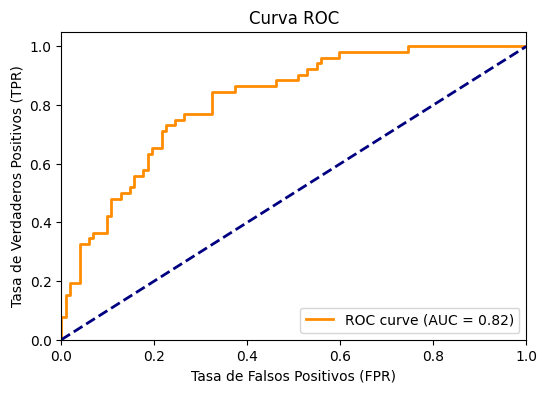

In [28]:
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


La curva ROC ilustra la capacidad del modelo para distinguir entre pacientes con y sin diabetes en diferentes umbrales de decisión. En el eje horizontal se encuentra la tasa de falsos positivos (FPR) y en el eje vertical la tasa de verdaderos positivos (TPR). Un modelo ideal se acercaría a la esquina superior izquierda (TPR alto y FPR bajo), mientras que un modelo sin capacidad de discriminación seguiría la diagonal azul.

En este caso, la curva se ubica significativamente por encima de la diagonal, lo que confirma que el modelo logra una buena capacidad de separación entre clases. El valor de AUC = 0.82 respalda esta conclusión, ya que un AUC superior a 0.8 suele considerarse un resultado sólido en problemas de clasificación médica.

Sin embargo, aunque el AUC refleja un buen desempeño global, la curva también muestra que aún existe un compromiso entre la sensibilidad y la especificidad. Esto significa que dependiendo del umbral elegido, el modelo puede priorizar la detección de más casos positivos (mejor recall) o reducir los falsos positivos (mejor precisión). En un contexto clínico, convendría ajustar este límite para minimizar los falsos negativos, pues no detectar a un paciente con diabetes puede tener consecuencias más graves que clasificar erróneamente a un paciente sano.

## **5. Reflexión**

1. ¿Qué ventajas y desventajas encontró al usar AutoGluon y AutoML en general?

- Una de las ventajas más grandes es la rapidez, puesto que en muy poco tiempo pudimos entrenar, comparar y seleccionar entre varios modelos sin tener que programar todo desde cero. También os gustó que AutoGluon facilita la evaluación y que se adapta bien a problemas de clasificación tabular. La desventaja principal es que se pierde cierto control sobre el proceso, ya que no siempre es claro qué hace cada modelo por dentro ni cómo se ajustan todos los hiperparámetros. Además, puede consumir bastantes recursos de la computadora, lo que hace que a veces no sea tan ligero de usar.

<br>

2. ¿Qué métricas considera más relevantes en este problema?

- En este caso, lo más importante no es solo la accuracy, sino el recall y el F1-score de la clase positiva (pacientes diabéticos). El recall es fundamental porque mide qué tan bien el modelo detecta a los pacientes que realmente tienen diabetes. Un falso negativo en salud puede ser mucho más grave que un falso positivo. El F1-score, al equilibrar precisión y recall, también ayuda a evaluar el desempeño global sin que el desbalance de clases afecte demasiado.

<br>

3. ¿Qué preocupaciones deberían tomarse al aplicar este tipo de herramientas en salud?

- En un ámbito médico hay que ser especialmente cuidadosos. Primero, asegurar que los datos estén bien limpios y representen de manera justa a la población, porque un sesgo en los datos puede traer consecuencias graves. Segundo, recordar que un modelo de AutoML no debe reemplazar la decisión clínica, por lo que debe usarse como un apoyo para los profesionales de la salud. Finalmente, es importante evaluar con varias métricas y no confiarse únicamente en la accuracy, porque los falsos negativos pueden poner en riesgo la vida de los pacientes.

<br>

4. ¿Cómo compara esta experiencia con construir un modelo manualmente?

- Usar AutoGluon es mucho más rápido y práctico, porque en poco tiempo se obtienen resultados sólidos sin necesidad de invertir tanto esfuerzo en pruebas manuales. Sin embargo, construir un modelo manualmente ayuda a aprender y comprender a fondo qué pasa en cada etapa,  desde la selección de características hasta el ajuste de hiperparámetros. Personalmente, creo que AutoML es excelente para tener resultados rápidos o para proyectos prácticos, pero el enfoque manual sigue siendo valioso para entender de verdad cómo funcionan los algoritmos y poder explicarlos con mayor claridad.

